# Oscilloskope USBTCM utility

In [1]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np

class UsbTmcDriver:

    def __init__(self, device):
        self.device = device
        self.FILE = os.open(device, os.O_RDWR)
 
    def write(self, command):
        os.write(self.FILE, command);
 
    def read(self, length = 500):
        return os.read(self.FILE, length)
 
    def getName(self):
        self.write("*IDN?")
        return self.read(300)
 
    def sendReset(self):
        self.write("*RST")  # Be carefull, this real resets an oscilloscope

# Looking for USBTMC device
def getDeviceList(): 
    dirList=os.listdir("/dev")
    result=list()

    for fname in dirList:
        if(fname.startswith("usbtmc")):
            result.append("/dev/" + fname)

    return result

# looking for oscilloscope
devices =  getDeviceList()
# initiate oscilloscope
osc = UsbTmcDriver(devices[0])


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Read number of waveforms and write it to a file

<IPython.core.display.Javascript object>


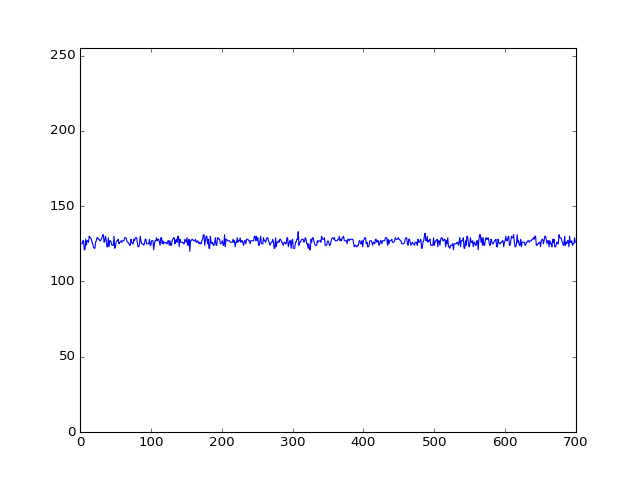

XINC: 9.999999e-08
YINC: 0.0004


In [60]:
runs = 10

%matplotlib notebook
fig,ax = plt.subplots(1,1)

osc.write(':WAV:XINC?')
xinc = float(osc.read(100))
print 'XINC:', xinc
osc.write(':WAV:YINC?')
yinc = float(osc.read(100))
print 'YINC:', yinc

osc.write(':WAV:SOUR CHAN1')
osc.write(':WAV:MODE NORM')
osc.write(':WAV:FORM BYTE')
osc.write(':WAV:POIN 700')

with h5py.File('data.h5', 'w') as hf:
    hf.create_dataset('XINC', data=(xinc))
    hf.create_dataset('YINC', data=(yinc))
    #hf.create_dataset('YINC', bytearray(yinc))
    for n in range(runs):
        #osc.write(':RUN')
        # waiting for SINGLE trigger
        osc.write(':SING')
        osc.write(':TRIG:STAT?')
        while (osc.read(4) != 'STOP'):
            osc.write(':TRIG:STAT?')
        time.sleep(0.1)

        #osc.write(':STOP')
        osc.write(':WAV:DATA?')
        wave1 = bytearray(osc.read(500))
        wave2 = bytearray(osc.read(500))
        wave = np.concatenate((wave1[11:],wave2[:(700-489)]))
        #osc.write(':WAV:RES')
        hf.create_dataset(str(n), data=wave)
        fig.clf()
        plt.ylim(0, 255)
        plt.plot(wave)
        fig.canvas.draw()

 

## Read waveforms from the file

XINC: 9.999999e-08    YINC: 0.0004
121 134 88596
121 134 88512
121 132 88699
120 132 88521
121 133 88514
120 133 88477
121 133 88642
121 133 88560
121 133 88611
120 133 88456


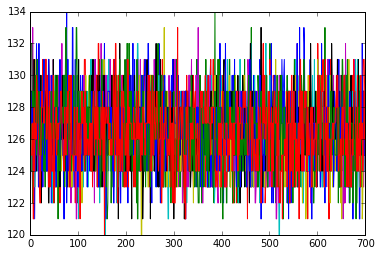

In [61]:
%matplotlib inline 

with h5py.File('data.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC'))
    for n in range(10):
        data = hf.get(str(n))
        np_data = np.array(data)
        plt.plot(np_data)
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(700):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        print minimum, maximum, suma


## Capture waveforms and plot it

<IPython.core.display.Javascript object>


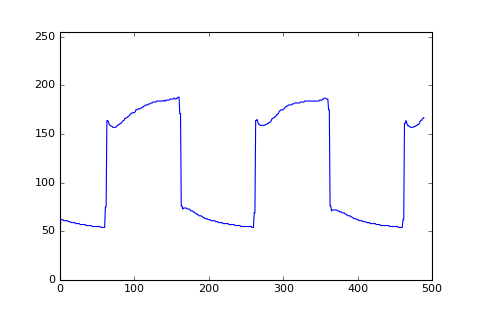

In [98]:
%matplotlib notebook

fig,ax = plt.subplots(1,1)

# looking for oscilloscope
devices =  getDeviceList()
# initiate oscilloscope
osc = UsbTmcDriver(devices[0])

df = pd.Series(0) # Create a new dataframe

for n in range(10):
    # waiting for SINGLE trigger
    osc.write(':SINGLE')
    osc.write(':TRIG:STAT?')
    while (osc.read(4) != 'STOP'):
        osc.write(':TRIG:STAT?')

    #osc.write(':STOP')
    osc.write(':WAV:SOUR CHAN1')
    osc.write(':WAV:MODE NORM')
    osc.write(':WAV:FORM BYTE')
    osc.write(':WAV:DATA?')

    #wave = map(float, osc.read(100).split(','))
    wave = bytearray(osc.read(1400))

    fig.clf()
    plt.ylim(0, 255)
    plt.plot(wave[10:])
    fig.canvas.draw()
    time.sleep(0.1)


XINC: 2e-10
YINC: 0.0004
XINC: 2e-10    YINC: 0.0004
102 149 89701
102 149 89701
102 149 89701
102 149 89701
102 149 89701
102 149 89701
102 149 89701
102 149 89701
102 149 89701
102 149 89701


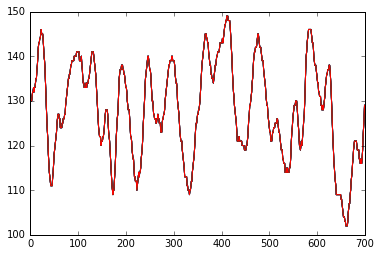

In [120]:
runs = 10

osc.write(':WAV:XINC?')
xinc = float(osc.read(100))
print 'XINC:', xinc
osc.write(':WAV:YINC?')
yinc = float(osc.read(100))
print 'YINC:', yinc

osc.write(':WAV:SOUR CHAN1')
osc.write(':WAV:MODE NORM')
osc.write(':WAV:FORM BYTE')
osc.write(':WAV:POIN 700')

with h5py.File('data.h5', 'w') as hf:
    hf.create_dataset('XINC', data=(xinc))
    hf.create_dataset('YINC', data=(yinc))
    #hf.create_dataset('YINC', bytearray(yinc))
    for n in range(runs):
        #osc.write(':RUN')
        # waiting for SINGLE trigger
        osc.write(':SING')
        osc.write(':TRIG:STAT?')
        while (osc.read(4) != 'STOP'):
            osc.write(':TRIG:STAT?')
        time.sleep(0.2)

        #osc.write(':STOP')
        osc.write(':WAV:DATA?')
        wave1 = bytearray(osc.read(500))
        wave2 = bytearray(osc.read(500))
        wave = np.concatenate((wave1[11:],wave2[:(700-489)]))
        #osc.write(':WAV:END')
        hf.create_dataset(str(n), data=wave)

%matplotlib inline 

with h5py.File('data.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC'))
    for n in range(10):
        data = hf.get(str(n))
        np_data = np.array(data)
        plt.plot(np_data)
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(700):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        print minimum, maximum, suma


<IPython.core.display.Javascript object>


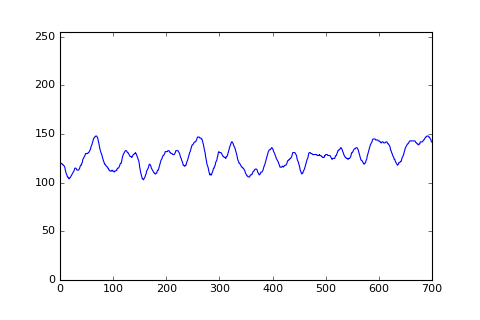

XINC: 2e-10
YINC: 0.0004


In [91]:
runs = 1

%matplotlib notebook
fig,ax = plt.subplots(1,1)

osc.write(':WAV:XINC?')
xinc = float(osc.read(100))
print 'XINC:', xinc
osc.write(':WAV:YINC?')
yinc = float(osc.read(100))
print 'YINC:', yinc

osc.write(':WAV:SOUR CHAN1')
osc.write(':WAV:MODE NORM')
osc.write(':WAV:FORM BYTE')
osc.write(':WAV:POIN 700')

with h5py.File('data.h5', 'w') as hf:
    hf.create_dataset('XINC', data=(xinc))
    hf.create_dataset('YINC', data=(yinc))
    #hf.create_dataset('YINC', bytearray(yinc))
    for n in range(runs):
        #osc.write(':RUN')
        # waiting for SINGLE trigger
        #osc.write(':SING')
        #osc.write(':TRIG:STAT?')
        #while (osc.read(4) != 'STOP'):
        #    osc.write(':TRIG:STAT?')
        #time.sleep(0.1)

        #osc.write(':STOP')
        osc.write(':WAV:DATA?')
        wave1 = bytearray(osc.read(500))
        wave2 = bytearray(osc.read(500))
        wave = np.concatenate((wave1[11:],wave2[:(700-489)]))
        #osc.write(':WAV:RES')
        hf.create_dataset(str(n), data=wave)
        fig.clf()
        plt.ylim(0, 255)
        plt.plot(wave)
        fig.canvas.draw()

 

## Readin buffer with stored records

In [217]:
with h5py.File('data.h5', 'w') as hf:
    osc.write(':FUNC:WREP:FEND?') # get number of last frame
    frames = int(osc.read(100))
    print 'FRAMES:', frames
    hf.create_dataset('FRAMES', data=(frames)) # write number of frames
    hf.create_dataset('XINC', data=(xinc)) # write axis parameters
    hf.create_dataset('YINC', data=(yinc))
    for n in range(1,frames+1):
        osc.write(':FUNC:WREP:FCUR ' + str(n)) # skip to n-th frame
        time.sleep(0.1)

        osc.write(':WAV:DATA?') # read data
        #time.sleep(0.4)
        wave1 = bytearray(osc.read(500))
        wave2 = bytearray(osc.read(500))
        wave = np.concatenate((wave1[11:],wave2[:(700-489)]))
        hf.create_dataset(str(n), data=wave)
    

FRAMES: 63


In [14]:
%matplotlib inline 

with h5py.File('data.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = np.array(data)
        plt.plot(np_data)
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(700):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        print minimum, maximum, suma

IOError: Unable to open file (Unable to open file: name = 'data.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

XINC: 5e-08    YINC: 0.0004    FRAMES: 508
1 , 49 , 113 , 97734
2 , 51 , 74 , 84574
3 , 49 , 88 , 82005
4 , 51 , 88 , 90309
5 , 47 , 82 , 82550
6 , 50 , 83 , 81224
7 , 49 , 149 , 93818
8 , 49 , 141 , 97653
9 , 49 , 81 , 81940


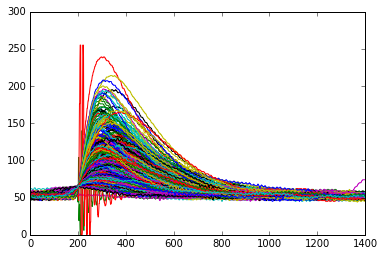

In [13]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


with h5py.File('./data/shift1/run3/data1.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = np.array(data)
        plt.plot(np_data)
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        if n<10:
            print n,',', minimum,',', maximum,',', suma

In [12]:
plt.figure(figsize=(20,10))

x = []
y = []
z = []


def ProcessData():
        #print('List of arrays in this file: \n', hf.keys())
        print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES'))
        frames = np.array(hf.get('FRAMES'))
        for n in range(1,frames+1):
            data = hf.get(str(n))
            np_data = np.array(data)
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            #if n<10:
            #    print n,',', minimum,',', maximum,',', suma
     


for f in range(1,6-1):
    with h5py.File('./data/shift1/run3/data'+str(f)+'.h5','r') as hf:
        ProcessData()
for f in range(1,28-1):
    with h5py.File('./data/shift1/run4/data'+str(f)+'.h5','r') as hf:
        ProcessData()

    #plt.scatter(x,y,edgecolor = 'none',marker='.')
ble = plt.hist2d(y, x, bins=(500,100), range=np.array([(60000, 100000), (40, 200)]),cmap=plt.cm.jet)
    #plt.hist(z, bins=20) 
    #plt.ylim(40000,100000)
    #plt.xlim(40,100)


IOError: Unable to open file (Unable to open file: name = './data/shift1/run3/data1.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

# Simply replot the current x, y in a nicer way

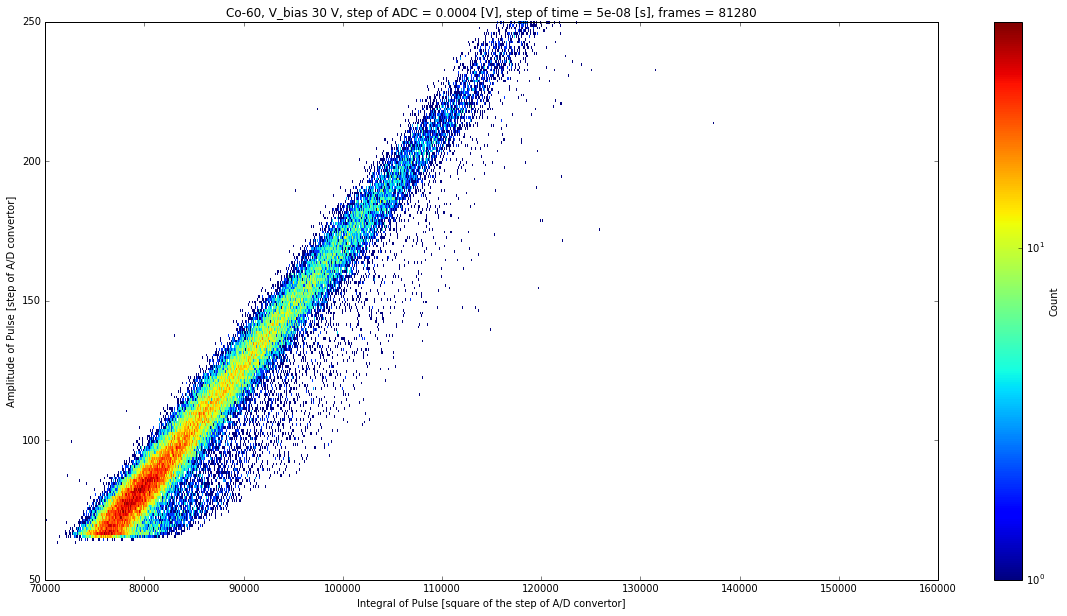

In [23]:
plt.figure(figsize=(20,10))

ble = plt.hist2d(y, x, bins=(1000,250-50),range=np.array([(70000,160000),(50,250)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(100,30),range=np.array([(70000, 80000),(50,80)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D convertor]')
plt.ylabel('Amplitude of Pulse [step of A/D convertor]')
plt.title('Co-60, V_bias 30 V, step of ADC = ' + str(yinc) + ' [V], step of time = ' + str(xinc) + ' [s], frames = '+ str(all_frames))
cb = plt.colorbar()
cb.set_label('Count')

## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

./data/Co-60/30V/data93.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data35.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data85.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data78.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data4.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data6.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data148.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data60.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data31.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data159.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data72.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data125.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data21.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/data52.h5 XINC: 5e-08    YINC: 0.0004    FRAMES: 508
./data/Co-60/30V/da

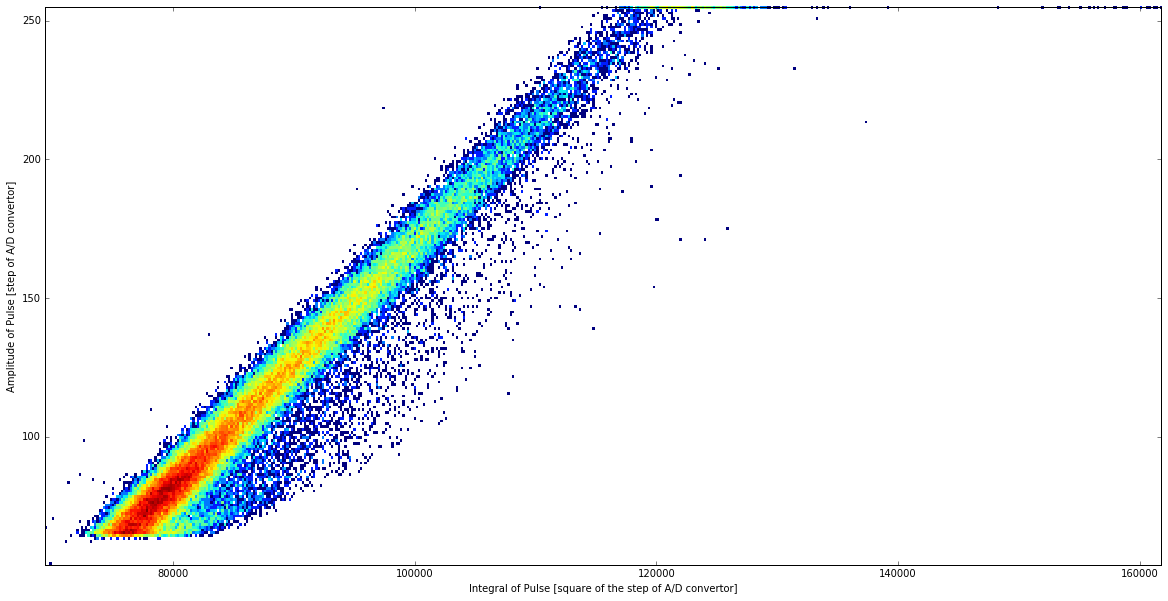

In [22]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, '   YINC:', yinc, '   FRAMES:', frames
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            np_data = np.array(data)
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
     
for f in glob.iglob("./data/Co-60/30V/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(figsize=(20,10))

ble = plt.hist2d(y, x, bins=(500,200), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D convertor]')
plt.ylabel('Amplitude of Pulse [step of A/D convertor]')
#cb = plt.colorbar()
#cb.set_label('Count')